# Applied plotting, charting & data representation in Python

**Applied plotting, charting & data representation in Python** was the second course in the **Applied Data Science with Python** specialization. This notebook shows my work for the three assignments that I had to solve during this course:

* **Plotting weather patterns**

In this assignment I had to make a visualization of weather patterns using the high and record low temperatures by day of the year over the period 2005-2014.

* **Building a custom visualization**

For this assignment I had to implement a visualization of sample data as described in Ferreria et al (2014).

* **Becoming an independent data scientist**

This assignment required to identify at least two publicly accessible datasets that are consistent across a meaningful dimension. I had to state a research question that can be answered using these datasets and then create a visual using *matplotlib* that addresses the stated research question. I also had to justify how the visual addresses my research question.

## Plotting Weather Patterns
----

The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

The following variables were provided in the dataset:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

This assignment required following the next steps:

1. Read the documentation then write python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing the solution. 

In [1]:
# Import useful libraries
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

%matplotlib notebook

In [2]:
# Read the dataframe and have a peak at it
df = pd.read_csv('datasets/weather_data.csv')
df.head(4)

,ID,Date,Element,Data_Value
0,SPE00120512,2009-10-15,TMIN,159
1,SPE00120512,2009-12-30,TMIN,122
2,SPE00120512,2005-08-24,TMIN,194
3,SPE00120512,2005-01-01,TMAX,185


In [3]:
# Transform the temperature to degrees Celsius
df['Data_Value'] = df['Data_Value']/10

In [4]:
# Transform the date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Get the year of each measurement
df['Year'] = df['Date'].dt.year

# Get the month and day of each measurement
df['Month_Day'] = df['Date'].dt.strftime('%m-%d')

# Remove February 29
df = df[df['Month_Day']!='02-29']

# Find the record high and lows from 2005-2014
df_highs = df[(df.Year>=2005)&(df.Year<2015)&(df.Element=='TMAX')].groupby(['Month_Day'])['Data_Value'].max()
df_lows = df[(df.Year>=2005)&(df.Year<2015)&(df.Element=='TMIN')].groupby(['Month_Day'])['Data_Value'].min()

In [5]:
# Create datetime index
date_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')

<IPython.core.display.Javascript object>


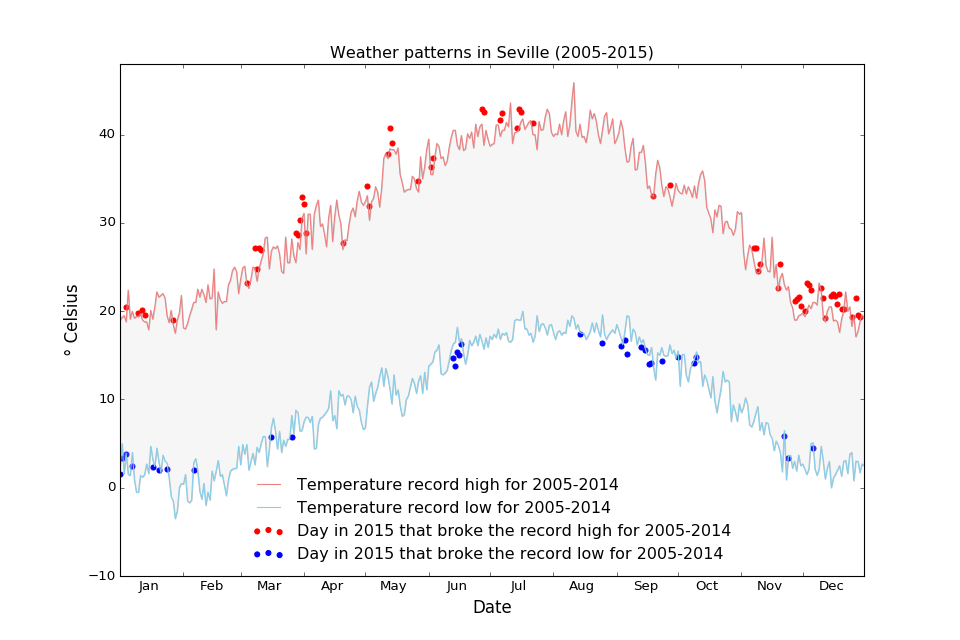

In [6]:
# Plot high and lows
plt.figure(figsize=(12,8))
plt.plot(date_index, df_highs, color='lightcoral',linewidth=1)
plt.plot(date_index, df_lows, color='skyblue', linewidth=1)
plt.xlabel('Date', fontsize=15)
plt.ylabel('° Celsius', fontsize=15)

# Set x and y limits.
ax = plt.gca()
ax.axis(['2015/01/01','2015/12/31',-10,48])

# Format the xticks to show the month centered
# Original code can be found here:
# http://matplotlib.org/examples/pylab_examples/centered_ticklabels.html
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')


In [7]:
# Plot scatter points for 2015
df = df.merge(df_highs.reset_index(drop=False).rename(columns={'Data_Value':'Max_temp'}), on='Month_Day',
              how='left')
df = df.merge(df_lows.reset_index(drop=False).rename(columns={'Data_Value':'Min_temp'}), on='Month_Day',
              how='left')

breaking_high = df[(df.Year==2015)&(df.Data_Value>df.Max_temp)]
breaking_low = df[(df.Year==2015)&(df.Data_Value<df.Min_temp)]

In [8]:
plt.scatter(breaking_high.Date.values, breaking_high.Data_Value.values, color='red');
plt.scatter(breaking_low.Date.values, breaking_low.Data_Value.values, color='blue');

In [9]:
# Create legend and title
plt.legend(['Temperature record high for 2005-2014', 'Temperature record low for 2005-2014',
           'Day in 2015 that broke the record high for 2005-2014',
           'Day in 2015 that broke the record low for 2005-2014'], loc='lower center', frameon=False)
plt.title('Weather patterns in Seville (2005-2015)')

In [10]:
# Fill in between the high and low measurements
ax.fill_between(date_index, df_highs, df_lows, facecolor='lightgray', alpha=0.2)

## Building a custom visualization
----
For this assignment I had to implement a visualization of sample data as described in Ferreria et al (2014). I had implemented the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis). 

I chose the **Even Harder option** in which I had to make the plot interactive, allowing the user to click on the y axis to set the value of interest. The bar colors change with respect to what value the user has selected.

In [16]:
# Initialize data:
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(33500,150000,3650), 
                   np.random.normal(41000,90000,3650), 
                   np.random.normal(41000,120000,3650), 
                   np.random.normal(48000,55000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,2793.851077,105341.500709,-44415.807259,-49859.545652,328367.085875,242510.874946,47436.181512,75761.922925,148853.385142,220465.210458,...,138454.070217,122488.069943,162247.982356,-273907.868554,-138410.570396,27638.756441,-33120.047151,-40989.824866,94532.974507,6128.841097
1993,-44406.485331,180815.466879,-108866.427539,-114625.083717,196807.232582,47161.295355,136522.083654,58826.904901,23329.019613,-96417.638483,...,-37809.868064,93228.910228,108183.379950,146728.060346,-10083.899508,-31300.144215,95017.857057,164071.514663,14409.944591,33298.608969
1994,134288.798913,169097.538334,337957.368420,-76005.273164,90130.207911,8453.626320,-24562.317561,195665.400438,-53475.640770,44708.230667,...,145216.405451,67773.006363,95711.194465,174500.629277,-27821.888075,-57881.583140,26321.525617,-21424.067186,60164.652898,-74750.286614
1995,-44485.202120,-156.410517,-13425.878636,53540.999558,130408.559874,20445.656224,60336.077232,60688.099156,-12748.496722,57150.175074,...,-636.804950,49707.896672,52687.564135,13529.920850,67016.324752,41664.942829,119870.946944,56946.289297,67927.466106,32839.707999


<IPython.core.display.Javascript object>


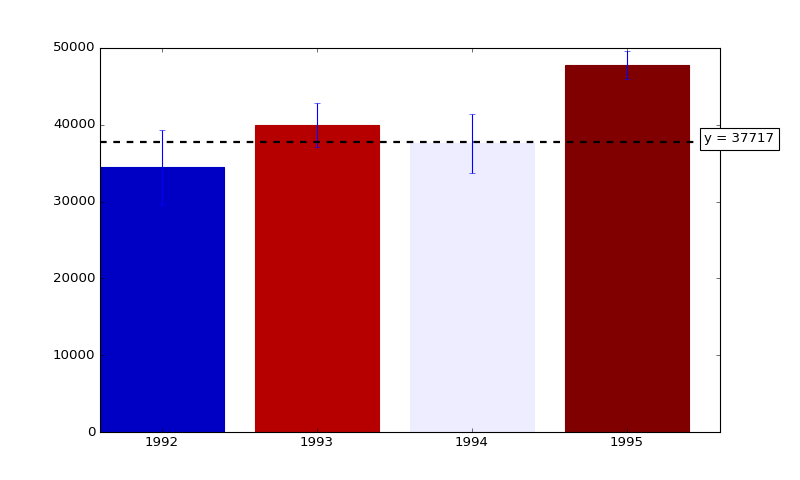

In [23]:
# Import useful libraries 
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
%matplotlib notebook

# Compute mean of each sample
df_mean = df.mean(axis=1) 

# Compute standard deviation of the mean (standard error)
df_std = df.std(axis=1)/np.sqrt(df.shape[1])

# Initialize a value for the horizontal axis
y = 37000

# Creating colors for each column sample
norm = Normalize(vmin=-1.96, vmax=1.96)
cmap = get_cmap('seismic')
df_colors = pd.DataFrame([])
df_colors['intensity'] = norm((df_mean-y)/df_std)
df_colors['color'] = [cmap(x) for x in df_colors['intensity']]

# Plot figure
plt.figure(figsize=(10,6))
bar_plot = plt.bar(df.index, df_mean, yerr=df_std*1.96, color=df_colors['color']);
hoz_line = plt.axhline(y=y, color='k', linewidth=2, linestyle='--');
y_text = plt.text(1995.9, y, 'y = %d' %y, bbox=dict(fc='white',ec='k'));

# Add xticks
plt.xticks(df.index+0.4, ('1992', '1993', '1994', '1995'));

In [24]:
# Add interactivity
def onclick(event):
    for i in range(4):
        shade = cmap(norm((df_mean.values[i]-event.ydata)/df_std.values[i]))
        bar_plot[i].set_color(shade) 
    hoz_line.set_ydata(event.ydata)
    y_text.set_text('y = %d' %event.ydata);
    y_text.set_position((1995.9, event.ydata));
    
plt.gcf().canvas.mpl_connect('button_release_event', onclick);

## Becoming an Independent Data Scientist
----

This assignment required to identify at least two publicly accessible datasets that are consistent across a meaningful dimension. I had to state a research question that can be answered using these datasets and then create a visual using matplotlib that addresses the stated research question. I also had to justify how the visual addresses my research question.

As this assignment was for the whole course, I had to incorporate and defend the principles discussed in the first week and align with Cairo’s principles of truth, beauty, function, and insight.

### Region and the domain category of the dataset
* Gijon, Spain and air quality

### Research question
* How is the air quality in Gijon, a relatively small town in Spain, in comparison with the air quality of a densely populated city as New York?

### Datasets
Gijon, Spain, Air Quality 2015 - Download [here](http://datos.gob.es/catalogo/l01330241-calidad-del-aire-datos-ano-2015-validados).

New York, U.S.A, Air Quality 2015 - Download [here](https://aqsdr1.epa.gov/aqsweb/aqstmp/airdata/download_files.html#Daily).

The data included air quality measurements of:
* Sulphur dioxide 
* Carbon monoxide
* Nitrogen dioxide

In [25]:
# Import useful libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Display all columns
pd.set_option('display.max_columns',None)

# Interactive matplotlib environment
%matplotlib notebook

# Set plot style
sns.set_style("white")

In [26]:
# Read Spanish air quality data
spain_air = pd.read_csv('datasets/22.csv', encoding='latin8')

# Convert dates to datetime
spain_air['Fecha Solar (UTC)'] = pd.to_datetime(spain_air['Fecha Solar (UTC)'])

# Compute the mean for each hour of all the substations
spain_air = spain_air.groupby(['Fecha Solar (UTC)']).mean()

# Compute the mean measurements for every day
spain_air = spain_air.resample('D').mean().ix[:-1,:]

# Scale from ppm to 100ppm
spain_air['CO'] *= 100

# Select only the relevant columns, add measurement unit and unstack the pollutants
spain_air = (spain_air[['SO2', 'CO', 'NO2']].rename(columns={
            'SO2':'SO2 [ppb]', 'CO':'CO [10²ppm]', 
            'NO2':'NO2 [ppb]'}).unstack().reset_index(level=0)
            .rename(columns={'level_0': 'Pollutant', 0:'Value'}))

# Insert the name of the region
spain_air['Region'] = 'Gijón, Spain. Population: 0.273 million'

In [27]:
# Find U.S.A air quality files
usa_air_files = os.listdir('datasets')
usa_air_files = [x for x in usa_air_files if 'daily' in x]

# Create name pollutants
indicators = ['SO2 [ppb]', 'CO [10²ppm]', 'NO2 [ppb]']

# Read dataframe for each pollutant and merge the measurements into one big dataset.
# Select only the measurements from New-York city
for i in range(3):
    temp = pd.read_csv('datasets/'+usa_air_files[i], usecols=['City Name', 'Date Local', 
                                                  'Arithmetic Mean'])
    temp = temp[temp['City Name']=='New York'].groupby(['Date Local']).mean()
    
    temp.rename(columns={'Arithmetic Mean': indicators[i]}, inplace=True)
    
    if i!=0:
        usa_air = usa_air.join(temp)
    else:
        usa_air = temp

# Scale from ppm to 100ppm
usa_air['CO [10²ppm]'] *= 100

# Unstack pollutants 
usa_air = usa_air.unstack().reset_index(level=0).rename(columns={'level_0': 'Pollutant', 0:'Value'})

# Insert region name
usa_air['Region'] = 'New York, U.S.A. Population: 8.491 million'

<IPython.core.display.Javascript object>


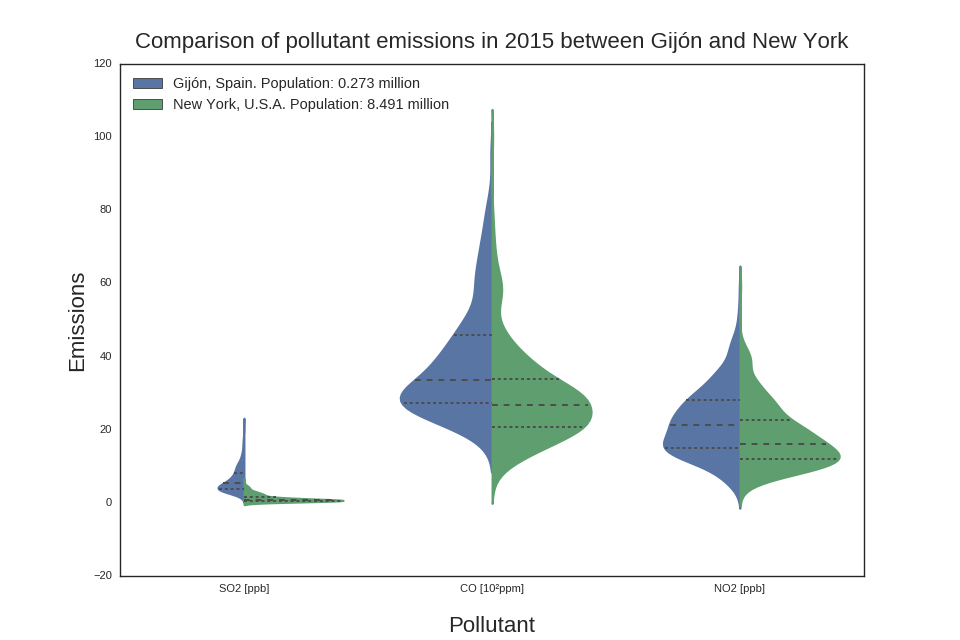

In [28]:
# Concatenate the air quality measurements from both Gijon and New York
air_quality = pd.concat([spain_air, usa_air], axis=0)

# Draw a nested violinplot and split the violins for each region in part
plt.figure(figsize=(12,8))
sns.violinplot(x="Pollutant", y="Value", hue="Region", data=air_quality, split=True, inner='quartile');
plt.xlabel('Pollutant', fontsize=20, labelpad=20);
plt.ylabel('Emissions', fontsize=20);
plt.rc('xtick', labelsize=15);
plt.rc('ytick', labelsize=15);
plt.legend(loc='upper left', fontsize=13);
ttl = plt.title('Comparison of pollutant emissions in 2015 between Gijón and New York', fontsize=20)
ttl.set_position([.5, 1.02])